# Project: Insights on Patients' Commitment to their Scheculed Medical Appointment.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
## Introduction

> To gain further insights and knowledge in the Data Analysis Process, a Medical Appointment data was selected for indepth analysis. This data contains the information of patients that booked an appointment on a **scheduled day** and whether or not the patient was available on the **appointment day**. 

> Following this, some questions were posed to analyse the relationship between certain variables and whether or not a patient showed up for their appointment. The major questions addressed in this report includes:
 - How does the gender of a patient relate to their availability on their scheduled appointment day?
 - Does the age bracket (i.e child, adolescence, adult or seniors) of a patient affect their presence on their scheduled appointment day? 
 - What is the relationship between the wait time (difference between the scheduled and appointment day) and whether or not a patient shows up for their appointment?
 - What feature/variable has the highest proportion of patients' who didn't show up for their appointment?

In [315]:
# import key packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Gathering/Assessing Data

In [316]:
# load appointment_stats_2016.csv
df = pd.read_csv('appointment_stats_2016.csv')
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [317]:
# check the number of rows and columns of the dataset
df.shape

(110527, 14)

In [318]:
# check the summary description of the dataset
df.describe()

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Firstly, the data was loaded. Minor info like the number of rows & columns (110527, 14) was checked.
Further to this, a minor description of the data was called up to to have a clear insight on the intricacies of the data for further analysis.

In [319]:
# confirm the number of unique values for each column
df.nunique()

patient_id           6100
appointment_id     110527
gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hipertension            2
diabetes                2
alcoholism              2
handcap                 5
sms_received            2
no_show                 2
dtype: int64

In [320]:
# confirm that the dataset doesn't contain any duplicates
sum(df.duplicated())

0

This **.nunique()** shows the amount of unique values for each column. With this information, it is evident that the appointment_id is the only column with completely unique information in each row. Hence, it is safe to conclude that there are no duplicate information in the dataset.

In [321]:
# examine the summary info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This cell above shows basic information about the data. Some of the basic information include:
 - number of rows and columns
 - whether or not a column has a null value
 - the data type of each column.

### Data Cleaning

In [323]:
# use rename to correct the spelling of handicap
df.rename(columns={'handcap':'handicap'}, inplace=True)

In [322]:
# use query to call up the negative age value and invalid digits for age and handicap columns respectively
neg_age = df.query('age <= 0').index
handicap = df.query('handcap > 1').index

In [324]:
# drop the rows of age and handicap earlier called up
df.drop(neg_age, inplace=True)
df.drop(handicap, inplace=True)

In [325]:
# drop the patient_id and appointment_id
df.drop(['patient_id', 'appointment_id'], axis=1, inplace=True)

In [326]:
# use to_datetime to convert the the scheduled_day and appointment_day to datetime
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

The following anomalies were identified while gathering/assessing the dataset:
 - The lowest age value is -1 which is impossible
 - The handcap column has values of 2, 3 and 4. According to the discussions on Kaggle, this is an error. The only values expected in the handicap columns are 0 and 1. 0 for those who are not handicapped and 1 for those who are handicapped. Also, the word handcap is a mispelt version of handicap.
 - The scheuled_day and appointment_day datatypes are both objects. The correct datatype for a data is datetime.
 
In light of this, errors listed were treated and the data has been cleaned accordingly.

Also, the patient_id and appointment_id were dropped as this rows would not be needed in the analysis.

<a id='eda'></a>
## Exploratory Data Analysis

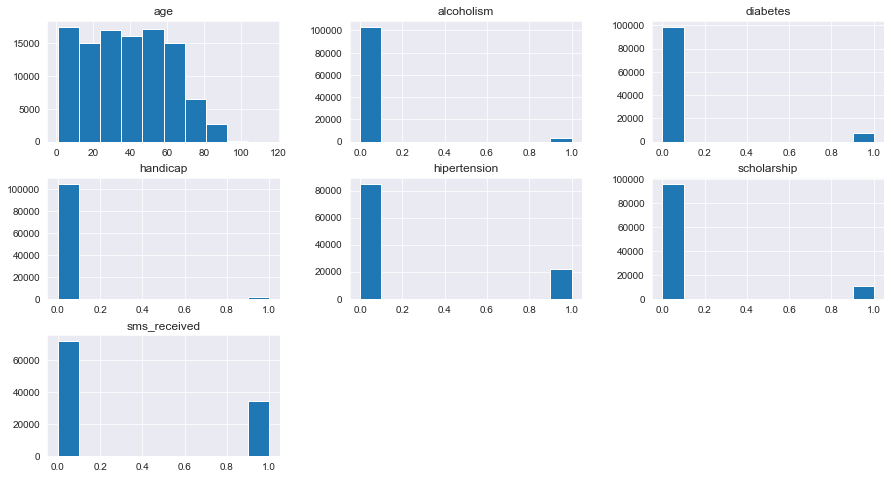

In [327]:
# use hist to check the distribution for all int associated variables
df.hist(figsize=(15, 8));

> Before delving into answering the Research Questions, a histogram of all features in the dataset was pubished. This helps give a better description of the distribution of the values of each feature.


### Q1. How does the gender of a patient relate to their availability on their scheduled appointment day?

In [328]:
# use groupby to get the total count for appointment committment for both genders
gender_counts = df.groupby(['gender', 'no_show']).age.count()
gender_counts

gender  no_show
F       No         55760
        Yes        14249
M       No         29389
        Yes         7390
Name: age, dtype: int64

#### Steps
1. The total number of males and females that showed up and didn't show up for their scheduled appointment was called up.

In [329]:
# use groupby to calculate the total amount of patients for both genders
gender_total = df.groupby('gender').age.count()
gender_total

gender
F    70009
M    36779
Name: age, dtype: int64

2. The total number of males and females that scheduled an appointment was called up.

From the figures above, a higher percentage of the patients that scheduled an appointment were females.

In [330]:
# calculate the proportion of females with regards to their appointment committment
female_proportions = gender_counts.F / gender_total.F
female_proportions

no_show
No     0.796469
Yes    0.203531
Name: age, dtype: float64

3. The proportion of females who showed up as well as didn't show up for their scheduled appointment was established.

In [331]:
# calculate the proportion of males with regards to their appointment committment
male_proportions = gender_counts.M / gender_total.M
male_proportions

no_show
No     0.79907
Yes    0.20093
Name: age, dtype: float64

4. The proportion of males who showed up as well as didn't show up for their scheduled appointment was established.

In [332]:
ind = np.arange(len(female_proportions)) # assign the x location for each gender
width = 0.2 # the width of the bars

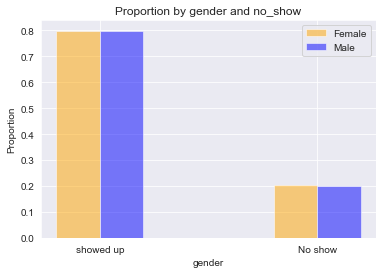

In [333]:
# plot a bar chart with labels
female_bars = plt.bar(ind, female_proportions, width, color='orange', alpha=.5, label='Female')
male_bars = plt.bar(ind + width, male_proportions, width, color='b', alpha=.5, label='Male')

#title & labels
plt.ylabel('Proportion')
plt.xlabel('gender')
plt.title('Proportion by gender and no_show')
locations = ind + width / 2 
labels = ['showed up', 'No show']  
plt.xticks(locations, labels)

#legend
plt.legend();

With respect to the figures and plot, the gender of the patients who scheduled an appointment does not necessarily affect their commitment to the appointment. 79.65% of the females who scheduled an appointment actually showed up and 79.91% of males who scheduled an appointment showed up.


### Q2. Does the age bracket (i.e child, adolescence, adult or seniors) of a patient affect their presence on their scheduled appointment day?

In [334]:
# create bin edges to divide the data into groups
bin_edges = [0, 12, 18, 59, 115] 

In [335]:
# assign labels for the four age_group
bin_names = ['Child', 'Adolescence', 'Adult', 'Seniors']

In [336]:
# create the age_group column
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

In [337]:
# confirm successful execution
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Seniors
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Seniors
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult


#### Steps
1. The age of each patient was grouped as follows:
<ul>
<li><a>(0 - 12)years     -   Child</a></li>
<li><a>(13 - 18)years    -   Adolescence</a></li>
<li><a>(19 - 59)years    -   Adult</a></li>
<li><a>(59 & above)years -   Seniors</a></li>
</ul>

In [338]:
# use groupby to calculate the amount of patients representing each age_group
age_counts = df.groupby(['age_group', 'no_show']).count().age # show the amount in terms of appointment committment
age_counts

age_group    no_show
Child        No         13812
             Yes         3663
Adolescence  No          5767
             Yes         2038
Adult        No         47692
             Yes        12715
Seniors      No         17878
             Yes         3223
Name: age, dtype: int64

2. The total number of patients that showed up and those that showed up for their appointments for each age group was called up.

In [339]:
# use groupby to calculate the total amount of patients representing each age_group
age_total = df.groupby('age_group').age.count()
age_total

age_group
Child          17475
Adolescence     7805
Adult          60407
Seniors        21101
Name: age, dtype: int64

3. The total number of patients that showed up and those that showed up for their appointments for each age group was called up.
From the call, it was observed that large patients of the patients that scheduled an appointment were **Adults** and very few were **Adolescence**

In [340]:
# calculate the proportions of children in relation to their appointment committment
child_props = age_counts.Child / age_total.Child
child_props

no_show
No     0.790386
Yes    0.209614
Name: age, dtype: float64

In [341]:
# calculate the proportions of adolescence in relation to their appointment committment
adolescence_props = age_counts.Adolescence / age_total.Adolescence
adolescence_props

no_show
No     0.738885
Yes    0.261115
Name: age, dtype: float64

In [342]:
# calculate the proportions of adults in relation to their appointment committment
adult_props = age_counts.Adult / age_total.Adult
adult_props

no_show
No     0.789511
Yes    0.210489
Name: age, dtype: float64

In [343]:
# calculate the proportions of seniors in relation to their appointment committment
seniors_props = age_counts.Seniors / age_total.Seniors
seniors_props

no_show
No     0.847258
Yes    0.152742
Name: age, dtype: float64

4. The proportion of patients that showed up and didn't show up for their appointments for each age group was called up.

In [344]:
ind = np.arange(len(child_props)) # assign the x location for each age_group
width = 0.2 # the width of the bars

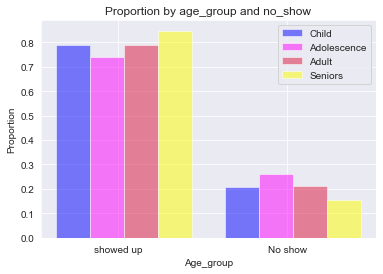

In [345]:
# plot bars with correct labels
child_bars = plt.bar(ind, child_props, width, color='blue', alpha=.5, label='Child')
adolescence_bars = plt.bar(ind + width, adolescence_props, width, color='magenta', alpha=.5, label='Adolescence')
adult_bars = plt.bar(ind + width + width, adult_props, width, color='crimson', alpha=.5, label='Adult')
seniors_bars = plt.bar(ind + width + width + width, seniors_props, width, color='yellow', alpha=.5, label='Seniors')

#titles and labels
plt.ylabel('Proportion')
plt.xlabel('Age_group')
plt.title('Proportion by age_group and no_show')
locations = ind + width + width / 3
labels = ['showed up', 'No show']  
plt.xticks(locations, labels)

# legend
plt.legend();

From the chart, the proportion of Seniors (59years & above) that showed up for their appointment was greater than other age groups.


### Q3. What is the relationship between the wait time (difference between the scheduled and appointment day) and whether or not a patient shows up for their appointment?

The wait time refers to the amount of time (seconds, minutes, hours, days) between a patient's scheduled day and appointment day.

In [346]:
# create a new column called waiting_time
df['waiting_time'] = (df.appointment_day - df.scheduled_day).dt.days
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group,waiting_time
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Seniors,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Seniors,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult,-1


In [347]:
# use describe to check the summary description of the dataset
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,waiting_time
count,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000
mean,38.299294,0.101051,0.203356,0.073978,0.031389,0.019113,0.323426,9.169972
std,22.453253,0.301397,0.402497,0.261737,0.174368,0.136922,0.467786,15.266420
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


#### Steps
1. A new column, waiting_time, was created. It showed the difference in days between a patient's scheduled day and appointment day.
2. The **.describe()** method was called up to analyse the basic description of the waiting_time column. It was observed that the minimum waiting_time as well as 25% of the waiting_time was below 0.   

In [348]:
#use query to select the negative waiting_time
neg_wait_time = df.query('waiting_time < 0').index
neg_wait_time

Int64Index([     0,      1,      2,      3,      4,      8,     19,     24,
                26,     28,
            ...
            110505, 110506, 110508, 110509, 110510, 110511, 110512, 110513,
            110514, 110517],
           dtype='int64', length=37082)

In [349]:
# use drop to delete the rows with a negative waiting_time and create a new dataset df2
df2 = df.drop(neg_wait_time)

In [350]:
# confirm that selected rows were deleted
df2.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,waiting_time
count,69706.000000,69706.000000,69706.000000,69706.000000,69706.000000,69706.000000,69706.000000,69706.000000
mean,39.663085,0.095214,0.214860,0.076722,0.026038,0.017000,0.495481,14.580309
std,22.238193,0.293513,0.410728,0.266152,0.159249,0.129272,0.499983,16.515202
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


3. In order to solve the snag posed by the negative waiting_time, a new dataframe, df2, was created. In this new dataframe, all waiting_time with a negative value was dropped.

In [351]:
# create bin edge that will be used to group the data
bin_edge = [-1, 3, 8, 21, 178]

In [352]:
# assign labels to the 4 groups
bin_name = ['0-3days', '4-8days', '9-21days', '22-178days']

In [353]:
# create wait_duration column
df2['wait_duration'] = pd.cut(df2['waiting_time'], bin_edge, labels=bin_name)

In [354]:
# cofirm that column has been successfully created
df2.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group,waiting_time,wait_duration
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,Seniors,1,0-3days
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Adult,1,0-3days
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Adult,1,0-3days
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,Adult,1,0-3days
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,Adult,1,0-3days


4. After dropping all rows with a negative waiting_time, a new column, wait_duration, was created. This column was created in relation to the **min, 25%, 50%, 75% and max** values of the waiting_time for patients. The breakdown is as follows:
<ul>
<li><a>min - 25%     -   0-3days</a></li>
<li><a>25%-50%    -   4-8days</a></li>
<li><a>50% - 75%   -   9-21days</a></li>
<li><a>75%-100%  -   22-178days</a></li>
</ul>

In [355]:
#use group by to call up the amount of patients in each wait_duration based on their appointment committment
wait_counts = df2.groupby(['no_show', 'wait_duration']).count().age
wait_counts

no_show  wait_duration
No       0-3days          14994
         4-8days          11552
         9-21days         11889
         22-178days       11374
Yes      0-3days           4481
         4-8days           4164
         9-21days          5632
         22-178days        5620
Name: age, dtype: int64

In [356]:
# use groupby to call up the total number of patients in each wait_duration group
wait_totals = df2.groupby('wait_duration').count().age
wait_totals

wait_duration
0-3days       19475
4-8days       15716
9-21days      17521
22-178days    16994
Name: age, dtype: int64

In [357]:
# calculate the proportion of patients that showed up for their appointment
showed = wait_counts.No / wait_totals
showed

wait_duration
0-3days       0.769910
4-8days       0.735047
9-21days      0.678557
22-178days    0.669295
Name: age, dtype: float64

In [358]:
# calculate the proportion of patients that didn't show up for their appointment
not_show = wait_counts.Yes / wait_totals
not_show

wait_duration
0-3days       0.230090
4-8days       0.264953
9-21days      0.321443
22-178days    0.330705
Name: age, dtype: float64

5. The proportion of patients who showed up and for those who didn't show up for their appointments for each wait_duration was calculated.

In [359]:
ind = np.arange(len(showed)) # assign the x location for each wait_duration
width = 0.35 # the width of the bars

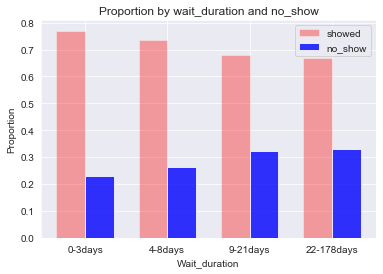

In [360]:
# plot the bars
showed_bars = plt.bar(ind, showed, width, color='r', alpha=.35, label='showed')
no_show_bars = plt.bar(ind + width, not_show, width, color='b', alpha=.8, label='no_show')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Wait_duration')
plt.title('Proportion by wait_duration and no_show')
locations = ind + width / 2
labels = ['0-3days', '4-8days', '9-21days', '22-178days']  
plt.xticks(locations, labels)

# legend
plt.legend();

6. It was observed that patients who had a longer wait duration are unlikely to show up for their appointments while patients who had a shorter wait duration were more likely to show up for their appointments.


### Q4. What feature/variable has the highest proportion of patients' who didn't show up for their appointment?

In [361]:
# use query to select the total number of patients that did and didn't show up for their appointment
showed_up = df.query('no_show == "No"')
missed = df.query('no_show == "Yes"')

In [362]:
# use groupby to select the hipertension variable and get it's proportion
hipertension_show = showed_up.groupby(['hipertension']).age.count()
hipertension_missed = missed.groupby(['hipertension']).age.count()

hipertension_props = hipertension_missed / (hipertension_show + hipertension_missed)
hipertension = hipertension_props[1]
hipertension

0.17259163750230244

In [363]:
# use groupby to select the sms_received variable and get it's proportion
sms_show = showed_up.groupby(['sms_received']).age.count()
sms_missed = missed.groupby(['sms_received']).age.count()

sms_props = sms_missed / (sms_show + sms_missed)
sms = sms_props[1]
sms

0.2767676182755226

In [364]:
# use groupby to select the handicap variable and get it's proportion
handicap_show = showed_up.groupby(['handicap']).age.count()
handicap_missed = missed.groupby(['handicap']).age.count()

handicap_props = handicap_missed / (handicap_show + handicap_missed)
handicap = handicap_props[1]
handicap

0.17932386085252328

In [365]:
# use groupby to select the diabetes variable and get it's proportion
diabetes_show = showed_up.groupby(['diabetes']).age.count()
diabetes_missed = missed.groupby(['diabetes']).age.count()

diabetes_props = diabetes_missed / (diabetes_show + diabetes_missed)
diabetes = diabetes_props[1]
diabetes

0.18

In [366]:
# use groupby to select the alcoholism variable and get it's proportion
alcohol_show = showed_up.groupby(['alcoholism']).age.count()
alcohol_missed = missed.groupby(['alcoholism']).age.count()

alcohol_props = alcohol_missed / (alcohol_show + alcohol_missed)
alcohol = alcohol_props[1]
alcohol

0.20137231503579953

In [367]:
# use groupby to select the scholarship variable and get it's proportion
scholarship_show = showed_up.groupby(['scholarship']).age.count()
scholarship_missed = missed.groupby(['scholarship']).age.count()

scholarship_props = scholarship_missed / (scholarship_show + scholarship_missed)
scholar = scholarship_props[1]
scholar

0.23816143082198127

> For this question, all features (hipertension, sms_received, handicap, diabetes, alcoholism, scholarship) were properly analysed to determine which feature has a higher proportion of patients that missed their appointments.

> To unravel this question, the proportion of patients who didn't show up for their appointment was calculated for all features.

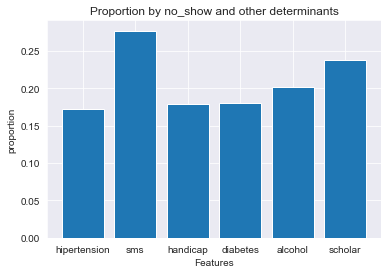

In [368]:
# plot a bar chart with proper labels and title
locations = [1, 2, 3, 4, 5, 6] # assign the x location for each feature
heights = [hipertension, sms, handicap, diabetes, alcohol, scholar]
labels = ['hipertension', 'sms', 'handicap', 'diabetes', 'alcohol', 'scholar']
plt.bar(locations, heights, tick_label=labels)
plt.title('Proportion by no_show and other determinants')
plt.xlabel('Features')
plt.ylabel('proportion');

It was observed that patients who received sms_messages has the highest proportion for those that didn't show up for their appointments.

While customers with hipertension have a lower proportion.

### Additional Observation

In [370]:
# use min and max to call up the minimum and maximum values for scheduled_day and appointment_day and find the difference
scheduled_total = df.scheduled_day.max() - df.scheduled_day.min()
appointment_total = df.appointment_day.max() - df.appointment_day.min()
scheduled_total, appointment_total

(Timedelta('211 days 12:53:27'), Timedelta('40 days 00:00:00'))

**Note:**

The days required to schedule an appointment is 211days while the days required for the appointment was 40days.

With regards to this result, over a 100,000 patients that scheduled an appointment within a period of 7 months are all expected to be available for their appointments within a period of 40days. A timeframe of 40days is quite small for that amount of patients. Nonetheless, the capacity of the clinic might as well be able to accommodate that much traffic.

<a id='conclusions'></a>
## Conclusion
Below are the observations from the report:
 - About 21% of patients don't show up for their scheduled appointments.
 - More females scheduled an appointment.
 - Senior citizens are probably more likely to show up for their appointments than other age groups.
 - The amount of time required to wait for an appointment might affect the patients availability for that appointment.
 - Patients who are hipertensive are probably more likely to show up for their appointments.
 
### Limitation
One major limitation I encountered in this project was deciding whether or not to base my whole analysis on the dataframe, df2, I used in answering Q3. In this dataframe, all rows associated with a negative wait_duration was dropped.

I didn't go ahead with that because inasmuch as those particular appointment dates were lesser than the scheduled dates, some of those patients still showed up for their appointments.